# Merging Datasets to one Dataframe (.csv)

quellen https://hackernoon.com/14-open-datasets-for-text-classification-in-machine-learning-xd1u3wit

1. emails https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/?ref=hackernoon.com
2. blogs https://u.cs.biu.ac.il/~koppel/BlogCorpus.htm?ref=hackernoon.com, https://www.kaggle.com/datasets/saurabhbagchi/sample-blog-corpus
3. news https://www.kaggle.com/datasets/benjaminawd/new-york-times-articles-comments-2020, https://www.kaggle.com/datasets/sunnysai12345/news-summary?select=news_summary.csv
4. products_reviews https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews?select=test.csv
5. poems https://www.kaggle.com/datasets/michaelarman/poemsdataset
6. paper https://www.kaggle.com/datasets/benhamner/nips-papers?select=papers.csv
7. recipes https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews


In [1]:
import pandas as pd

## emails

In [43]:
# Read in the data from emails.csv
df = pd.read_csv('./data/emails/emails.csv')

In [44]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [45]:
df['file'] = 1
df['kategorie_bezeichnung'] = 'email'
df.rename(columns={'file':'kategorie_id','message':'inhalt'}, inplace=True)

In [46]:
df.head()

,kategorie_id,inhalt,kategorie_bezeichnung
0,1,Message-ID: <18782981.1075855378110.JavaMail.e...,email
1,1,Message-ID: <15464986.1075855378456.JavaMail.e...,email
2,1,Message-ID: <24216240.1075855687451.JavaMail.e...,email
3,1,Message-ID: <13505866.1075863688222.JavaMail.e...,email
4,1,Message-ID: <30922949.1075863688243.JavaMail.e...,email


In [6]:
# view content of first row
print(df.message.iloc[1])

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

## blogs

In [8]:
df_blog = pd.read_csv('./data/blogs/blogtext.csv')

In [47]:
df_blog['kategorie_id'] = 2
df_blog['kategorie_bezeichnung'] = 'blog'
df_blog.rename(columns={'text':'inhalt'}, inplace=True)

In [48]:
df_blog.drop(['id','gender','age','topic','sign','date'], axis=1, inplace=True)

In [50]:
df_blog.drop(['word_count'], inplace=True, axis=1)

In [51]:
df_blog.head()

,inhalt,kategorie_id,kategorie_bezeichnung
0,"Info has been found (+/- 100 pages,...",2,blog
1,These are the team members: Drewe...,2,blog
2,In het kader van kernfusie op aarde...,2,blog
3,testing!!! testing!!!,2,blog
4,Thanks to Yahoo!'s Toolbar I can ...,2,blog


In [52]:
print(df_blog.inhalt.iloc[4])

             Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate instructions like: 'go to the site, click on the pop-audio button then choose...'.  So, without further ado here is the link to 24-hour K-Pop  urlLink audio  and the  urlLink video  streaming.  Enjoy.         


In [53]:
# df_blog["word_count"] = df_blog.text.apply(lambda x: len(x.split()))

In [54]:
df_blog.describe()

,kategorie_id
count,681284.0
mean,2.0
std,0.0
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0


In [56]:
# df_blog.word_count.plot(kind='box')

## news

In [15]:
df_news = pd.read_csv('./data/news/news_summary.csv', encoding='latin-1')

In [17]:
df_news["text_wordcount"] = df_news.text.apply(lambda x: len(x.split()))
df_news["ctext_wordcount"] = df_news.ctext.apply(lambda x: len(str(x).split()))

In [57]:
df_news.head()

,author,date,headlines,read_more,text,ctext,text_wordcount,ctext_wordcount
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...,60,364
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo...",60,396
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...,60,335
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,60,404
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...,60,526


In [18]:
df_news.describe()

,text_wordcount,ctext_wordcount
count,4514.000000,4514.000000
mean,58.287328,334.125831
std,2.320266,357.069264
min,44.000000,1.000000
25%,57.000000,176.000000
50%,59.000000,277.000000
75%,60.000000,406.000000
max,62.000000,12202.000000


In [59]:
df_news['kategorie_id'] = 3
df_news['kategorie_bezeichnung'] = 'news'
df_news.drop(['author','date','read_more','text_wordcount','text_wordcount','ctext_wordcount'], axis=1, inplace=True)
df_news.rename(columns={'text':'inhalt','ctext':'inhalt_kurz'}, inplace=True)

In [61]:
df_news.rename(columns={'headlines':'titel'}, inplace=True)

In [62]:
df_news.head()

,titel,inhalt,inhalt_kurz,kategorie_id,kategorie_bezeichnung
0,Daman & Diu revokes mandatory Rakshabandhan in...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...,3,news
1,Malaika slams user who trolled her for 'divorc...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo...",3,news
2,'Virgin' now corrected to 'Unmarried' in IGIMS...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...,3,news
3,Aaj aapne pakad liya: LeT man Dujana before be...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,3,news
4,Hotel staff to get training to spot signs of s...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...,3,news


## reviews

In [20]:
df_reviews = pd.read_csv('./data/reviews/test.csv')

In [21]:
df_reviews.head()

,cat,betreff,content
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [22]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cat      400000 non-null  int64 
 1   betreff  399990 non-null  object
 2   content  400000 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [23]:
df_reviews.describe()

,cat
count,400000.000000
mean,1.500000
std,0.500001
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [63]:
df_reviews['kategorie_id'] = 4
df_reviews['kategorie_bezeichnung'] = 'review'
df_reviews.rename(columns={'betreff':'titel','content':'inhalt'}, inplace=True)

In [65]:
df_reviews.drop(['cat'], axis=1, inplace=True)

In [66]:
df_reviews.head()

,titel,inhalt,kategorie_id,kategorie_bezeichnung
0,Great CD,My lovely Pat has one of the GREAT voices of h...,4,review
1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,4,review
2,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,4,review
3,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,4,review
4,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,4,review


## poems

In [24]:
# read in data from poems/forms folder and save content to df
import os
import csv

def save_txt_to_csv(folder_path, csv_file_path):
    with open(csv_file_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['Folder', 'Filename', 'Content'])  # Write header row
        
        for root, dirs, files in os.walk(folder_path):
            for file_name in files:
                if file_name.endswith('.txt'):
                    folder_name = os.path.basename(root)
                    file_path = os.path.join(root, file_name)
                    with open(file_path, 'r') as txt_file:
                        content = txt_file.read()
                    writer.writerow([folder_name, file_name, content])

# Example usage
folder_path = 'F:\Github_local\BA_data\Projektrealisierung_Gruppe_1\data_exploration\data\poems'  # Replace with the actual path to the "poems" folder
csv_file_path = 'F:\Github_local\BA_data\Projektrealisierung_Gruppe_1\data_exploration\data\poems\output.csv'  # Replace with your desired CSV file path

save_txt_to_csv(folder_path, csv_file_path)




In [26]:
df_poems = pd.read_csv('./data/poems/output.csv')

In [27]:
df_poems.describe()

,Folder,Filename,Content
count,6322,6322,6321
unique,135,6322,6117
top,villanelle,AbcPoems2AbcHkAndChinaV2Cauchy3Poembycheungshu...,Through the window I see that\nYou are walking...
freq,100,1,3


In [28]:
df_poems

,Folder,Filename,Content
0,abc,AbcPoems2AbcHkAndChinaV2Cauchy3Poembycheungshu...,2 ABC of H.k. and China revised vision.\nBarre...
1,abc,AbcPoems887LiveWithLoveAnAbcPoemPoembyMelvinaG...,"Apparently life without love, is no life at al..."
2,abc,AbcPoemsAAbcAnglesOnAngelsPoemByCauchy3Poembyc...,A abc angles on angels flaws (poem)\nMix with ...
3,abc,AbcPoemsAAbcBrazilDancePoemByCauchy3Poembycheu...,A abc Brazil dance (poem)\nJack of crack in po...
4,abc,AbcPoemsAbc123PoembyGabriellaFranco.txt,ABC... I can't go on\n123... what's the next o...
...,...,...,...
6317,villanelle,VillanellePoemsWhippomorphaVillanellePoembyDia...,“Greatest Auntie strayed at Oncewas Bay\nwhile...
6318,villanelle,VillanellePoemsWillAndElleAVillanellePoembyDia...,"'I don't believe in free will', ventured he,\n..."
6319,villanelle,VillanellePoemsWishWishTheDarknessAllAwayVilla...,"So comes the end of another day,\nDig the grav..."
6320,villanelle,VillanellePoemsYouAreFromMeSoFarAwayVillanelle...,"While LM Radio does my favourite music play,\n..."


In [67]:
df_poems['kategorie_id'] = 5
df_poems['kategorie_bezeichnung'] = 'poem'
df_poems.rename(columns={'Content':'inhalt'}, inplace=True)
df_poems.drop(['Folder','Filename'], axis=1, inplace=True)

In [68]:
df_poems.head()

,inhalt,kategorie_id,kategorie_bezeichnung
0,2 ABC of H.k. and China revised vision.\nBarre...,5,poem
1,"Apparently life without love, is no life at al...",5,poem
2,A abc angles on angels flaws (poem)\nMix with ...,5,poem
3,A abc Brazil dance (poem)\nJack of crack in po...,5,poem
4,ABC... I can't go on\n123... what's the next o...,5,poem


## paper 

In [29]:
df_papers = pd.read_csv('./data/paper/papers.csv')

In [30]:
df_papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [31]:
df_papers["word_count"] = df_papers.paper_text.apply(lambda x: len(x.split()))

In [32]:
df_papers.describe()

,id,year,word_count
count,7241.000000,7241.000000,7241.000000
mean,3655.912167,2006.439718,4849.317912
std,2098.435219,8.759919,1411.949448
min,1.000000,1987.000000,0.000000
25%,1849.000000,2000.000000,3639.000000
50%,3659.000000,2009.000000,5102.000000
75%,5473.000000,2014.000000,5898.000000
max,7284.000000,2017.000000,22249.000000


In [69]:
df_papers['kategorie_id'] = 6
df_papers['kategorie_bezeichnung'] = 'paper'
df_papers.rename(columns={'paper_text':'inhalt','abstract':'inhalt_kurz','title':'titel'}, inplace=True)
df_papers.drop(['id','year','event_type','pdf_name','word_count'], axis=1, inplace=True)

In [70]:
df_papers.head()

,titel,inhalt_kurz,inhalt,kategorie_id,kategorie_bezeichnung
0,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,6,paper
1,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,6,paper
2,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,6,paper
3,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,6,paper
4,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...",6,paper


## recipes

In [72]:
df_recipes = pd.read_csv('./data/recipes/recipes.csv')

In [73]:
df_recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [74]:
# show contenct of description column from first row
print(df_recipes["RecipeInstructions"].iloc[2])

c("Into a 1 quart Jar with tight fitting lid, put sugar and lemon peel, or zest;  add 1 1/2 cups very hot water (not from tap!). With lid fitted firmly, shake jar until sugar is dissolved.", "Add lemon juice. Refrigerate until chilled.", "To Serve: Into each 12-ounce glass, over ice cubes, pour 1/4 cup of the lemon syrup.", "Then add chilled club soda or, if you prefer, water.", "Stir to mix well.")


In [77]:
df_recipes["kategorie_id"] = 7
df_recipes["kategorie_bezeichnung"] = "recipe"
df_recipes.drop(['RecipeId', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield'], axis=1, inplace=True)

In [80]:
df_recipes.head()

,titel,inhalt_kurz,RecipeInstructions,kategorie_id,kategorie_bezeichnung
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,"c(""Toss 2 cups berries with sugar."", ""Let stan...",7,recipe
1,Biryani,Make and share this Biryani recipe from Food.com.,"c(""Soak saffron in warm milk for 5 minutes and...",7,recipe
2,Best Lemonade,This is from one of my first Good House Keepi...,"c(""Into a 1 quart Jar with tight fitting lid, ...",7,recipe
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,"c(""Drain the tofu, carefully squeezing out exc...",7,recipe
4,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,"c(""Mix everything together and bring to a boil...",7,recipe


In [86]:
df_recipes.rename(columns={'Name':'titel','RecipeInstructions':'inhalt','Description':'inhalt_kurz'}, inplace=True)

## merge data

In [87]:
# merge datasets
complete_df = pd.concat([df, df_blog, df_news, df_reviews, df_poems, df_papers, df_recipes], ignore_index=True)

In [94]:
# select subset of data where kategorie_id is 1
complete_df[complete_df['kategorie_id'] == 1]

,kategorie_id,inhalt,kategorie_bezeichnung,titel,inhalt_kurz
0,1,Message-ID: <18782981.1075855378110.JavaMail.e...,email,NaN,NaN
1,1,Message-ID: <15464986.1075855378456.JavaMail.e...,email,NaN,NaN
2,1,Message-ID: <24216240.1075855687451.JavaMail.e...,email,NaN,NaN
3,1,Message-ID: <13505866.1075863688222.JavaMail.e...,email,NaN,NaN
4,1,Message-ID: <30922949.1075863688243.JavaMail.e...,email,NaN,NaN
...,...,...,...,...,...
517396,1,Message-ID: <26807948.1075842029936.JavaMail.e...,email,NaN,NaN
517397,1,Message-ID: <25835861.1075842029959.JavaMail.e...,email,NaN,NaN
517398,1,Message-ID: <28979867.1075842029988.JavaMail.e...,email,NaN,NaN
517399,1,Message-ID: <22052556.1075842030013.JavaMail.e...,email,NaN,NaN


In [98]:
complete_df = complete_df[['kategorie_id','kategorie_bezeichnung','titel','inhalt_kurz','inhalt']]

In [100]:
complete_df.to_csv('./data/complete_data.csv', index=False)

In [103]:
complete_df.kategorie_id.value_counts()

2    681284
7    522517
1    517401
4    400000
6      7241
5      6322
3      4514
Name: kategorie_id, dtype: int64

<AxesSubplot:>

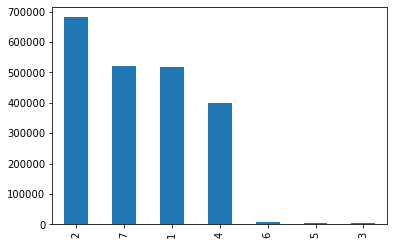

In [104]:
complete_df.kategorie_id.value_counts().plot(kind='bar')

In [114]:
# create subset of data with only 1000 rows per category
df_subset = complete_df.groupby('kategorie_id').head(4500)

In [115]:
df_subset.kategorie_id.value_counts()

1    4500
2    4500
3    4500
4    4500
5    4500
6    4500
7    4500
Name: kategorie_id, dtype: int64

<AxesSubplot:>

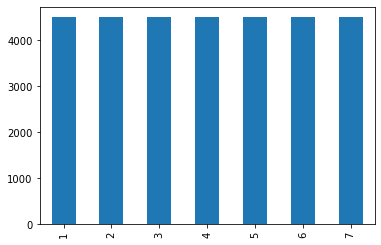

In [116]:
df_subset.kategorie_id.value_counts().plot(kind='bar')

In [117]:
df_subset.to_csv('./data/complete_data_subset.csv', index=False)